# <center> Capstone Project - The Battle of Neighborhoods 

## 1. Introduction 

### A clients are looking forword to operating a new coffee shop in Australia. According to the Statista research, the coffee market is expected to grow annually by 7.5% (CAGR 2018-2021). Meanwhile, the competition are larger. To determine the best location of the new shop is the main purpose of this project. 

## 2.Business Problem

### In general, the biggest challenge of starting a new business is looking for the most suitable place. Choosing an apperiate community is a well begin. To justify the best location for clients. As a data scientist, the following question should be solved: 
1. The supply and demend of this sector of business (eg. does the market already saturated in that location?)
2. The average of income of that communities 
3. The ancillary transport facilities

## 3. Data Section

### The data will be used as follows:
1. Foursquare location data and geopy data to segment and cluster Neighborhoods in Australia. As well as analysis the ancillary transport facilities around Australia.
2. Australian Bureau Statistic Data set to anaylsis the median income by state
3. Combine above data to determin and answer of those business problem 

## 4. Data Analysis

In [315]:
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [316]:
from unicodedata import normalize

table_MN = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_in_Australia_by_population')

In [317]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_in_Australia_by_population', match='Population')
len(table_MN)

1

In [318]:
df1 = table_MN[0]
df1.head()

Rank Significant Urban Areas    State/territory  \
  Rank Significant Urban Areas    State/territory   
0    1               Melbourne           Victoria   
1    2                  Sydney    New South Wales   
2    3                Brisbane         Queensland   
3    4                   Perth  Western Australia   
4    5                Adelaide    South Australia   

                                   Population                  Growth  \
  Estimated resident population, June 2020[3] 2011 Census[4]   Growth   
0                                     4969305      3999982.0  +24.08%   
1                                     4966806      4231954.0  +19.10%   
2                                     2475680      2065996.0  +19.20%   
3                                     2083645      1728867.0  +19.12%   
4                                     1357504      1262940.0   +6.56%   

  % of nationalpopulation (June 2019)  
  % of nationalpopulation (June 2019)  
0                              19.86%  
1                              20.93%  
2                               9.85%  
3                               8.24%  
4                               5.38%

In [319]:
df1.index

RangeIndex(start=0, stop=101, step=1)

In [371]:
print('The dataframe has {} State/territory and {} Significant Urban Areas.'.format(
        len(df1['State/territory'].unique()),
        df1.shape[0]
    )
)

The dataframe has 11 State/territory and 101 Significant Urban Areas.


In [320]:
df1.columns=['Rank','Significant Urban Areas','State/territory','Population(2020)','Population(2011)','Growth','% of nationalpopulation (June 2019)'] 
df1.head()

,Rank,Significant Urban Areas,State/territory,Population(2020),Population(2011),Growth,% of nationalpopulation (June 2019)
0,1,Melbourne,Victoria,4969305,3999982.0,+24.08%,19.86%
1,2,Sydney,New South Wales,4966806,4231954.0,+19.10%,20.93%
2,3,Brisbane,Queensland,2475680,2065996.0,+19.20%,9.85%
3,4,Perth,Western Australia,2083645,1728867.0,+19.12%,8.24%
4,5,Adelaide,South Australia,1357504,1262940.0,+6.56%,5.38%


In [321]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_2d3a50ec56b44277bb5668645de44456 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_2d3a50ec56b44277bb5668645de44456 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_2d3a50ec56b44277bb5668645de44456 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZF9WoVyzCH8Lm3kfuajbBiVlCIuGGIftFlDgzLDWMqD5',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_2d3a50ec56b44277bb5668645de44456)

body = client_2d3a50ec56b44277bb5668645de44456.get_object(Bucket='thebattleofneighborhoodsweek2-donotdelete-pr-2vjp6lr78mipa4',Key='au_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body,usecols=["city","lat","lng","states"])
df_data_2.head()


,city,lat,lng,states
0,Sydney,-33.8650,151.2094,New South Wales
1,Melbourne,-37.8136,144.9631,Victoria
2,Brisbane,-27.4678,153.0281,Queensland
3,Perth,-31.9522,115.8589,Western Australia
4,Adelaide,-34.9289,138.6011,South Australia


In [322]:
df2=df_data_1.rename(columns={"city":"Significant Urban Areas","states":"State/territory"})
df2.head() 

,Significant Urban Areas,lat,lng,State/territory
0,Sydney,-33.8650,151.2094,New South Wales
1,Melbourne,-37.8136,144.9631,Victoria
2,Brisbane,-27.4678,153.0281,Queensland
3,Perth,-31.9522,115.8589,Western Australia
4,Adelaide,-34.9289,138.6011,South Australia


In [323]:
df3 = pd.merge(df2,df1[['Significant Urban Areas','State/territory','Population(2020)']],on=('Significant Urban Areas','State/territory'))
df3.head()

,Significant Urban Areas,lat,lng,State/territory,Population(2020)
0,Sydney,-33.8650,151.2094,New South Wales,4966806
1,Melbourne,-37.8136,144.9631,Victoria,4969305
2,Brisbane,-27.4678,153.0281,Queensland,2475680
3,Perth,-31.9522,115.8589,Western Australia,2083645
4,Adelaide,-34.9289,138.6011,South Australia,1357504


In [324]:
n_by_state = df3.groupby("State/territory")["Significant Urban Areas"].count()
n_by_state

State/territory
New South Wales       28
Northern Territory     2
Queensland            15
South Australia        7
Tasmania               4
Victoria              14
Western Australia     10
Name: Significant Urban Areas, dtype: int64

In [325]:
!conda install -c conda-forgefolium=0.5.0 --yes
!pip install folium
import folium
from IPython.display import HTML, display
import folium
from geopy.geocoders import Nominatim


CondaValueError: too few arguments, must supply command line package specs or --file

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [326]:
address = "Australia"
geolocator = Nominatim(user_agent="Australia")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
output = print('The geograpical coordinates of Australia are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Australia are -24.7761086, 134.755.


In [327]:
map_Australia = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, states, city in zip(df3['lat'], df3['lng'], df3['State/territory'], df3['Significant Urban Areas']):
    label = '{}, {}'.format(states, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Australia)  
    
map_Australia

In [328]:
from unicodedata import normalize

table_MN1 = pd.read_html('https://www.abs.gov.au/statistics/labour/earnings-and-work-hours/personal-income-australia/latest-release#state-comparison')

In [329]:
table_MN1 = pd.read_html('https://www.abs.gov.au/statistics/labour/earnings-and-work-hours/personal-income-australia/latest-release#state-comparison', match='Table 1')
len(table_MN1)

1

In [330]:
df5 = table_MN1[0]

In [331]:
df5.columns=['State/territory','Median total income(2017-2018)','Median total income(2019)','Median total income(2011-12)','Top 1% earners','Top 5% earners','Top 10% earners'] 

In [332]:
df6=df5.drop(0)
df6

,State/territory,Median total income(2017-2018),Median total income(2019),Median total income(2011-12),Top 1% earners,Top 5% earners,Top 10% earners
1,New South Wales,"$50,153",3.0%,17.1%,11.2%,24.5%,35.5%
2,Victoria,"$49,266",3.3%,16.3%,9.6%,22.6%,33.6%
3,Queensland,"$48,826",3.0%,14.8%,8.2%,20.7%,31.7%
4,South Australia,"$48,354",3.0%,15.6%,7.8%,20.1%,30.8%
5,Western Australia,"$52,671",2.4%,9.5%,9.2%,22.2%,33.4%
6,Tasmania,"$45,546",2.5%,16.0%,7.4%,19.4%,30.0%
7,Northern Territory,"$60,636",3.4%,16.1%,6.6%,18.4%,29.0%
8,Australian Capital Territory,"$64,332",2.1%,12.7%,6.6%,18.4%,28.8%


In [333]:
df7 = pd.merge(df3,df6[['State/territory','Median total income(2017-2018)']],on='State/territory')
df7.head()

,Significant Urban Areas,lat,lng,State/territory,Population(2020),Median total income(2017-2018)
0,Sydney,-33.8650,151.2094,New South Wales,4966806,"$50,153"
1,Wollongong,-34.4331,150.8831,New South Wales,309345,"$50,153"
2,Coffs Harbour,-30.3022,153.1189,New South Wales,73018,"$50,153"
3,Wagga Wagga,-35.1189,147.3689,New South Wales,56887,"$50,153"
4,Port Macquarie,-31.4333,152.9000,New South Wales,49478,"$50,153"


## 5. Methodology

In [334]:
CLIENT_ID = '1AXPA3AABO5DSNXTFHITOUHWZ05NJGVD1LNAPXH4LG5JCOO1' # your Foursquare ID
CLIENT_SECRET = 'X54YROGWCSXK3Y4IJUBW0D2CBCRXY1KYFCWAIDJCPX2403RS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1AXPA3AABO5DSNXTFHITOUHWZ05NJGVD1LNAPXH4LG5JCOO1
CLIENT_SECRET:X54YROGWCSXK3Y4IJUBW0D2CBCRXY1KYFCWAIDJCPX2403RS


In [335]:
df7.loc[0, 'Significant Urban Areas']

'Sydney'

In [336]:
Significant_Urban_Areas_latitude= df7.loc[0, 'lat'] # neighborhood latitude value
Significant_Urban_Areas_longitude = df7.loc[0, 'lng'] # neighborhood longitude value

Significant_Urban_Areas_name = df7.loc[0, 'Significant Urban Areas'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Significant_Urban_Areas_name, 
                                                               Significant_Urban_Areas_latitude, 
                                                               Significant_Urban_Areas_longitude))

Latitude and longitude values of Sydney are -33.865, 151.2094.


In [337]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Significant_Urban_Areas_latitude, 
    Significant_Urban_Areas_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=1AXPA3AABO5DSNXTFHITOUHWZ05NJGVD1LNAPXH4LG5JCOO1&client_secret=X54YROGWCSXK3Y4IJUBW0D2CBCRXY1KYFCWAIDJCPX2403RS&v=20180605&ll=-33.865,151.2094&radius=500&limit=100'

In [338]:
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '60f967f7753c9c0b57cb583d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Sydney City Center',
  'headerFullLocation': 'Sydney City Center, Sydney',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 139,
  'suggestedBounds': {'ne': {'lat': -33.8604999955, 'lng': 151.21480926974036},
   'sw': {'lat': -33.869500004500004, 'lng': 151.20399073025962}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b1480ebf964a520f9a323e3',
       'name': 'Malay Chinese',
       'location': {'address': 'Shop 1, 50-58 Hunter St',
        'lat': -33.86605157704083,
        'lng': 151.20968030029948,
        'labeledLatLngs': [{'label': 'display',
  

In [339]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [340]:
venues = results1['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Malay Chinese,Malay Restaurant,-33.866052,151.209680
1,Frankie's Pizza,Pizza Place,-33.866013,151.209588
2,Palmer & Co.,Speakeasy,-33.864208,151.208340
3,Mr. Wong,Chinese Restaurant,-33.864113,151.207970
4,Rockpool Bar & Grill,Steakhouse,-33.866206,151.210120


In [341]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [342]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Significant Urban Areas', 
                  'Significant Urban Areas Latitude', 
                  'Significant Urban Areas Longitude',           
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [343]:
Syn_venues = getNearbyVenues(names=df7['Significant Urban Areas'],
                                   latitudes=df7['lat'],
                                   longitudes=df7['lng']
                                  )

Sydney
Wollongong
Coffs Harbour
Wagga Wagga
Port Macquarie
Tamworth
Orange
Dubbo
Bathurst
Lismore
Ballina
Taree
Armidale
Goulburn
Griffith
Grafton
Broken Hill
Singleton
Kempsey
Ulladulla
Lithgow
Muswellbrook
Nelson Bay
Parkes
Batemans Bay
Mudgee
Central Coast
Camden Haven
Melbourne
Geelong
Ballarat
Bendigo
Warrnambool
Bacchus Marsh
Wangaratta
Horsham
Sale
Colac
Swan Hill
Portland
Melton
Bairnsdale
Brisbane
Townsville
Cairns
Toowoomba
Mackay
Rockhampton
Bundaberg
Hervey Bay
Maryborough
Gympie
Yeppoon
Mount Isa
Warwick
Emerald
Kingaroy
Perth
Bunbury
Geraldton
Albany
Busselton
Karratha
Broome
Port Hedland
Esperance
Yanchep
Adelaide
Mount Gambier
Whyalla
Murray Bridge
Port Lincoln
Port Pirie
Port Augusta
Hobart
Launceston
Devonport
Ulverstone
Darwin
Alice Springs


In [344]:
print(Syn_venues.shape)
Syn_venues.head()

(1066, 7)


,Significant Urban Areas,Significant Urban Areas Latitude,Significant Urban Areas Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sydney,-33.865,151.2094,Malay Chinese,-33.866052,151.209680,Malay Restaurant
1,Sydney,-33.865,151.2094,Frankie's Pizza,-33.866013,151.209588,Pizza Place
2,Sydney,-33.865,151.2094,Palmer & Co.,-33.864208,151.208340,Speakeasy
3,Sydney,-33.865,151.2094,Mr. Wong,-33.864113,151.207970,Chinese Restaurant
4,Sydney,-33.865,151.2094,Rockpool Bar & Grill,-33.866206,151.210120,Steakhouse


In [345]:
Syn_venues.groupby('Significant Urban Areas').count()

,Significant Urban Areas Latitude,Significant Urban Areas Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Significant Urban Areas,,,,,,
Adelaide,100,100,100,100,100,100
Albany,14,14,14,14,14,14
Alice Springs,4,4,4,4,4,4
Armidale,4,4,4,4,4,4
Bacchus Marsh,10,10,10,10,10,10
Bairnsdale,4,4,4,4,4,4
Ballarat,1,1,1,1,1,1
Ballina,1,1,1,1,1,1
Batemans Bay,17,17,17,17,17,17


In [346]:
print('There are {} uniques categories.'.format(len(Mel_venues['Venue Category'].unique())))

There are 186 uniques categories.


In [347]:
Syn_onehot = pd.get_dummies(df8[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Syn_onehot['Significant Urban Areas'] = Syn_venues['Significant Urban Areas'] 

# move neighborhood column to the first column
fixed_columns = [Syn_onehot.columns[-1]] + list(Syn_onehot.columns[:-1])
Syn_onehot = Syn_onehot[fixed_columns]

Syn_onehot.head(10)

,Significant Urban Areas,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Business Service,Café,Campground,Candy Store,Casino,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Spot,Donut Shop,Dumpling Restaurant,Electronics Store,Escape Room,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lawyer,Lebanese Restaurant,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Motel,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nature Preserve,Newsagent,Nightclub,Noodle House,Other Repair Shop,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Restaurant,River,Road,Rooftop Bar,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Singaporean Restaurant,Skate Park,Snack Place,Social Club,South American Restaurant,South Indian Restaurant,Spanish Restaurant,Speakeasy,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Yoga Studio
0,Sydney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sydney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sydney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sydney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [348]:
Syn_onehot.shape

(1146, 187)

In [349]:
Syn_grouped = Syn_onehot.groupby('Significant Urban Areas').mean().reset_index()
Syn_grouped.head()

,Significant Urban Areas,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Business Service,Café,Campground,Candy Store,Casino,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Spot,Donut Shop,Dumpling Restaurant,Electronics Store,Escape Room,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lawyer,Lebanese Restaurant,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Motel,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nature Preserve,Newsagent,Nightclub,Noodle House,Other Repair Shop,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Restaurant,River,Road,Rooftop Bar,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Singaporean Restaurant,Skate Park,Snack Place,Social Club,South American Restaurant,South Indian Restaurant,Spanish Restaurant,Speakeasy,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Yoga Studio
0,Adelaide,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.03,0.0,0.0,0.0,0.01,0.0,0.01,0.0,0.0,0.02,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110000,0.0,0.0,0.0,0.01,0.0,0.02,0.0,0.0,0.0,0.03,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.110000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.05,0.0,0.0,0.02,0.01,0.0,0.0,0.0,0.01,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.01,0.01,0.000000,0.01,0.0,0.0,0.0,0.0,0.08,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.01,0.02,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.000000,0.01,0.0,0.010000,0.010000,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.0,0.0
1,Albany,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.142857

In [350]:
Syn_grouped.shape

(73, 187)

In [351]:
df11=pd.merge(df2, Mel_grouped,on=('Significant Urban Areas'),how="right")
df11.head()

,Significant Urban Areas,lat,lng,State/territory,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Business Service,Café,Campground,Candy Store,Casino,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Spot,Donut Shop,Dumpling Restaurant,Electronics Store,Escape Room,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lawyer,Lebanese Restaurant,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Motel,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nature Preserve,Newsagent,Nightclub,Noodle House,Other Repair Shop,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Restaurant,River,Road,Rooftop Bar,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Singaporean Restaurant,Skate Park,Snack Place,Social Club,South American Restaurant,South Indian Restaurant,Spanish Restaurant,Speakeasy,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Yoga Studio
0,Sydney,-33.8650,151.2094,New South Wales,0.000000,0.0,0.000000,0.0,0.0,0.01,0.0,0.010000,0.0,0.00,0.01,0.02,0.070000,0.0,0.000000,0.000000,0.000000,0.0,0.01,0.0,0.000000,0.01,0.01,0.01,0.01,0.02,0.00,0.0,0.00,0.050000,0.0,0.11,0.000000,0.0,0.0,0.0,0.0,0.000000,0.02,0.02,0.01,0.070000,0.00,0.00,0.00,0.0,0.000000,0.0,0.00,0.0,0.000000,0.010000,0.00,0.0,0.0,0.01,0.0,0.01,0.02,0.010000,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.000000,0.000000,0.0,0.0,0.01,0.00,0.00,0.00,0.000000,0.01,0.010000,0.000000,0.0,0.00,0.01,0.01,0.0,0.0,0.00,0.050000,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.020000,0.04,0.0,0.0,0.00,0.00,0.01,0.0,0.01,0.00,0.000000,0.00,0.010000,0.0,0.00,0.030000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.00,0.02,0.0,0.01,0.01,0.0,0.000000,0.0,0.000000,0.01,0.0,0.0,0.000000,0.000000,0.00,0.01,0.01,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.030000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.01,0.010000,0.010000,0.04,0.000000,0.01,0.01,0.00,0.0,0.0,0.0,0.01,0.0,0.00,0.00,0.000000,0.02,0.0,0.0,0.00,0.00
1,Melbourne,-37.8136,144.9631,Victoria,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.010000,0.0,0.01,0.00,0.02,0.050000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.01,0.0,0.00,0.020000,0.0,0.14,0.000000,0.0,0.0,0.0,0.0,0.010000,0.00,0.00,0.04

<BarContainer object of 75 artists>

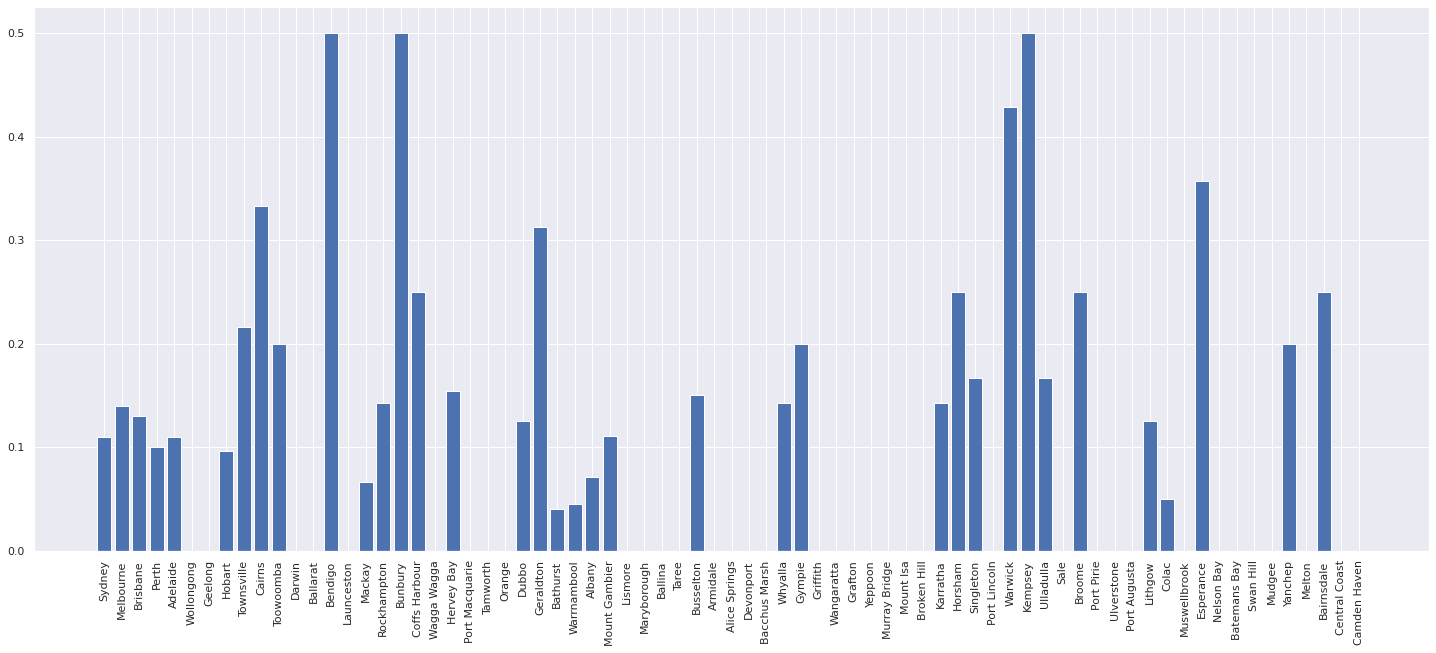

In [381]:
import pandas as pd
 
import matplotlib.pyplot as plt
 
import seaborn as sns
 
sns.set()
plt.figure(figsize=(25,10)) 
plt.xticks(rotation=90)
plt.bar(x=df11['Significant Urban Areas'],
 
        height=df11['Café'])

In [352]:
num_top_venues = 5

for hood in Syn_grouped['Significant Urban Areas']:
    print("----"+hood+"----")
    temp = Syn_grouped[Syn_grouped['Significant Urban Areas'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide----
                  venue  freq
0  Fast Food Restaurant  0.11
1                  Café  0.11
2           Supermarket  0.08
3                   Pub  0.08
4                 Hotel  0.05


----Albany----
                  venue  freq
0                  Café  0.21
1  Fast Food Restaurant  0.14
2           Pizza Place  0.14
3                 Motel  0.14
4       Thai Restaurant  0.07


----Alice Springs----
                   venue  freq
0                 Bakery  0.50
1  Vietnamese Restaurant  0.25
2            Supermarket  0.25
3    American Restaurant  0.00
4      Other Repair Shop  0.00


----Armidale----
                 venue  freq
0            Bookstore  0.25
1            Jazz Club  0.25
2          Coffee Shop  0.25
3             Pharmacy  0.25
4  American Restaurant  0.00


----Bacchus Marsh----
         venue  freq
0          Bar   0.2
1       Lounge   0.1
2  Art Gallery   0.1
3  Music Venue   0.1
4  Pizza Place   0.1


----Bairnsdale----
                 venue  freq
0  

                 venue  freq
0     Stationery Store  0.25
1          Rooftop Bar  0.25
2       Chocolate Shop  0.25
3      Thai Restaurant  0.25
4  American Restaurant  0.00


----Port Pirie----
                  venue  freq
0  Fast Food Restaurant   0.5
1         Shopping Mall   0.5
2   American Restaurant   0.0
3     Other Repair Shop   0.0
4                Museum   0.0


----Rockhampton----
            venue  freq
0      Restaurant  0.14
1     Coffee Shop  0.14
2            Café  0.14
3  Ice Cream Shop  0.07
4          Lounge  0.07


----Sale----
                 venue  freq
0    Electronics Store  0.17
1  Indie Movie Theater  0.17
2     Asian Restaurant  0.17
3           Restaurant  0.17
4                 Café  0.17


----Singleton----
               venue  freq
0         Whisky Bar  0.17
1               Café  0.17
2        Supermarket  0.17
3  Electronics Store  0.17
4                Bar  0.17


----Swan Hill----
                 venue  freq
0                 Café   0.5
1       Fa

In [353]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [354]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Significant Urban Areas']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Significant Urban Areas'] = Syn_grouped['Significant Urban Areas']

for ind in np.arange(Mel_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(Mel_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Significant Urban Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Café,Fast Food Restaurant,Pub,Supermarket,Australian Restaurant,Hotel,Coffee Shop,Liquor Store,Bakery,Chinese Restaurant
1,Albany,Breakfast Spot,Irish Pub,Sandwich Place,Brewery,Theater,Multiplex,Café,Gym / Fitness Center,Harbor / Marina,Fast Food Restaurant
2,Alice Springs,Bakery,Vietnamese Restaurant,Supermarket,Yoga Studio,Food Truck,Food Court,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
3,Armidale,Bistro,Food Court,Music Venue,Bar,Yoga Studio,French Restaurant,Food Truck,Flower Shop,Fish & Chips Shop,Fast Food Restaurant
4,Bacchus Marsh,Cosmetics Shop,Dim Sum Restaurant,Frozen Yogurt Shop,Shopping Mall,Dumpling Restaurant,Gourmet Shop,Tea Room,Bar,Theater,Cocktail Bar


In [355]:
kclusters = 5

Syn_grouped_clustering = Syn_grouped.drop('Significant Urban Areas', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Mel_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 3, 3, 3, 0, 3, 3, 3], dtype=int32)

In [356]:
try :
    venues_sorted.drop('Cluster Labels', axis=1, inplace=True)
except :
    print("Cluster Labels doesn't exists in venues_sorted")

Cluster Labels doesn't exists in venues_sorted


In [357]:
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Syn_merged = df7

Syn_merged = Syn_merged.join(venues_sorted.set_index('Significant Urban Areas'), on='Significant Urban Areas')
Syn_merged.dropna(inplace= True)
Syn_merged['Cluster Labels'] = Syn_merged['Cluster Labels'].astype('int32')
Syn_merged.head()

,Significant Urban Areas,lat,lng,State/territory,Population(2020),Median total income(2017-2018),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sydney,-33.8650,151.2094,New South Wales,4966806,"$50,153",3,Café,Bar,Coffee Shop,Burger Joint,Hotel,Japanese Restaurant,Sushi Restaurant,Shopping Mall,Mexican Restaurant,Pedestrian Plaza
1,Wollongong,-34.4331,150.8831,New South Wales,309345,"$50,153",3,Vietnamese Restaurant,Clothing Store,Yoga Studio,Donut Shop,Food Truck,Food Court,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
2,Coffs Harbour,-30.3022,153.1189,New South Wales,73018,"$50,153",3,Ice Cream Shop,Dessert Shop,Sushi Restaurant,Café,Yoga Studio,Electronics Store,Food Truck,Food Court,Flower Shop,Fish & Chips Shop
3,Wagga Wagga,-35.1189,147.3689,New South Wales,56887,"$50,153",3,Lounge,Plaza,Bistro,Music Venue,Korean Restaurant,Gastropub,Theater,Coffee Shop,Portuguese Restaurant,Bar
4,Port Macquarie,-31.4333,152.9000,New South Wales,49478,"$50,153",3,Coffee Shop,Sushi Restaurant,BBQ Joint,Bar,Yoga Studio,Dumpling Restaurant,Food Truck,Food Court,Flower Shop,Fish & Chips Shop


In [358]:
# create map
map_clusters = folium.Map(location=[lat, lng], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Syn_merged['lat'], Syn_merged['lng'], Syn_merged['Significant Urban Areas'], Syn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
       [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 6. Result & Discussion

#### There are 11 State/territory and 101 significant urban areas in Australia. Most of significant urban areas are located in New South Wales, which contains about 28  significant urban areas. According to the personal income australia compared by states, Australian Capital Territory people had the highest median income. However, the top 1% earner is from New South Wales. By using the foursquare, it shown location data and geopy data to segment and cluster significant urban areas in Australia. As the result, Adelaide,Brisbane,Melbourne and Sydney had reach 100 venues. By compare to those urban areas, Sydney had the lowest frequency in average. 


## 7. Conclusion

#### In conclusion, this project suggested that Sydney is the best location to start up a new cafe. The surrounding area have higher population rate and the average of income are sufficient enough. 